<a href="https://colab.research.google.com/github/GiftChimangeni/wqu-msc-financial-engineering/blob/main/Computational%20Finance%20Monte%20carlo%20simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import log, sqrt, exp
import random
import scipy as sp

In [2]:
# Input details
risk_free = 0.08 # Risk free rate
S_0 = 100 # today's stock price
sigma = 0.3 # volatility

strike = 100 # Strike price
T = 1 # Maturity in Years
current_time = 0

In [3]:
# Price a plain vanilla european call option using analytical formula
def d1(S_0,strike,T,risk_free,sigma, current_time):
    return(log(S_0/strike)+(risk_free+sigma**2/2.)*(T - current_time))/(sigma*sqrt(T-current_time))

def d2(S_0,strike,T,risk_free,sigma, current_time):
    return d1(S_0,strike,T,risk_free,sigma, current_time)-sigma*sqrt(T-current_time)


def analytic_callprice(S_0,strike,T,risk_free,sigma, current_time):
    return S_0*norm.cdf(d1(S_0,strike,T,risk_free,sigma, current_time))-strike*exp(-risk_free*(T-current_time))*norm.cdf(d2(S_0,strike,T,risk_free,sigma, current_time))

In [4]:
anal_callprice = analytic_callprice(S_0,strike,T,risk_free,sigma, current_time)

In [5]:
anal_callprice

15.711312547892973

15.679781775786577


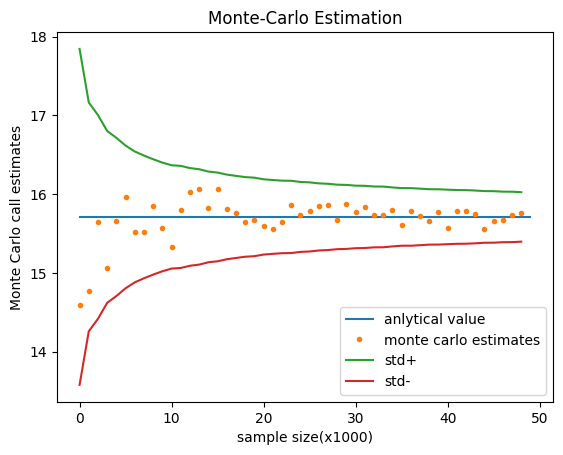

In [6]:
# Price the european call option using Monte Carlo simulations

import warnings
warnings.filterwarnings('ignore')

def determine_terminal_vaue(S_0, risk_free_rate, sigma, Z, T):
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def discounted_call_payoff(S_T, K, risk_free_rate, T):
    return np.exp(-risk_free_rate*T)*np.maximum(S_T-K,0)

np.random.seed(0)

mcall_estimates = [None]*50
mcall_std = [None]*50
for i in range(0,50):
    norm_arr = norm.rvs(size = 1000*i)
    term_val = determine_terminal_vaue(S_0,risk_free,sigma,norm_arr,T-current_time)
    mcall_val = discounted_call_payoff(term_val,strike,risk_free,T-current_time)
    mcall_estimates[i-1] = np.mean(mcall_val)
    mcall_std[i-1] = np.std(mcall_val)/np.sqrt(i*1000)

print(np.mean(mcall_estimates[0:-1]))
plt.plot([anal_callprice]*50, label="anlytical value")
plt.plot(mcall_estimates, '.', label="monte carlo estimates")
plt.plot(anal_callprice + np.array(mcall_std)*3, label="std+")
plt.plot(anal_callprice - np.array(mcall_std)*3, label="std-")
plt.legend(loc="lower right")
plt.xlabel("sample size(x1000)")
plt.ylabel("Monte Carlo call estimates")
plt.title("Monte-Carlo Estimation")
plt.show()

In [7]:
n_steps = 12 # 12 months

dt = T/n_steps # dt = 1/12

In [8]:
#Parameters:
risk_free = 0.08
S_0 = 100 #current share price
sigma = 0.3 #Volatility

K = 100
B = 150   #up-and-out barrier
T = 1 #Maturity


sigma_firm = 0.25 #Firm value volatility
debt = 175       #Debt of the firm
recovery_rate = 0.25
corr = 0.2    #Correlation between the counterparty and the stock price
dt = 1/12 #monthly simulations

In [9]:
# Correlation matrix and decompositon
corr_matrix = np.array([[1, corr], [corr, 1]])
L = np.linalg.cholesky(corr_matrix)

np.random.seed(0)

#Terminal share function.
def terminal_value(S_0, risk_free,sigma,Z,T):
    return S_0*np.exp((risk_free-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def share_path(S_0, risk_free, sigma, Z, dT):
    return S_0 * np.exp(np.cumsum((risk_free - sigma**2/2)*dT + sigma*np.sqrt(dT)*Z, axis=0))

def upout_call_payoff(path, K, risk_free, T):
    if path.any() > B:
        return 0
    else:
        return np.maximum(path[-1] - K,0)


def price_simulation(S_0, risk_free, sigma, dt, K, L):
    for i in range(1, 51):
        mc_upout_price = [None]*50
        norm_martix = norm.rvs(size=[12, 2, i*1000])
        corr_norm_martix = np.array([np.matmul(L, x) for x in norm_martix])
        mc_price_path = np.array([share_path(S_0, risk_free, sigma, Z_share, dt) for Z_share in corr_norm_martix[:,0,:].T])
        mc_upout_payoff = np.array([upout_call_payoff(path, K, risk_free, T) for path in mc_price_path])

    return mc_price_path, np.mean(mc_upout_payoff)

In [10]:
mc_price_path, up_and_out_price = price_simulation(S_0, risk_free, sigma, dt, K, L)

In [11]:
mc_price_path

array([[112.46074527, 114.66448406, 141.8308218 , ...,  95.25304751,
         97.29680022,  98.355591  ],
       [ 89.57473049,  87.0306242 ,  96.69113733, ...,  70.07918866,
         65.20522343,  67.92077364],
       [ 99.37263284,  98.43819754,  96.2953252 , ...,  92.2609019 ,
         92.29702388,  88.63680172],
       ...,
       [ 96.94879013, 100.42416753,  92.45452401, ...,  81.26154386,
         83.6366252 ,  82.90128172],
       [111.41283653, 122.11815748, 121.70688486, ..., 127.20672669,
        125.96761777, 146.67439825],
       [ 94.16472044,  99.25738556, 112.49937426, ..., 120.1244588 ,
        119.10248801, 116.84806896]])

In [18]:
# Multiply the constant by the up_and_out_price variable
result = 15.711312547892973 * up_and_out_price

# Display the result
print(result)

157.11312547892973


In [19]:
15.711312547892973-16.96572363403599

-1.2544110861430156

In [20]:
# Stike prices = 85, 90, 95, 105, 110, 115
for K in [85, 90, 95, 105, 110, 115]:
    mc_price_path, up_and_out_price = price_simulation(S_0, risk_free, sigma, dt, K, L)
    print("-------For Strike price = ", K, "--------")
    print("Share Price paths")
    print(mc_price_path)
    print("up and out price")
    print(up_and_out_price)

-------For Strike price =  85 --------
Share Price paths
[[111.69786144 109.1306342  120.13537152 ... 141.99876636 142.40066589
  165.6754127 ]
 [114.42057534 118.21147011 124.89199892 ... 130.01788198 123.73532548
  117.08841321]
 [ 98.50391925  97.00149854 108.31141058 ... 103.53538002 100.95578262
   90.13152275]
 ...
 [ 94.92274364 102.9047451  103.41711169 ...  90.9983252  100.2806259
   98.72090236]
 [104.07716742 115.53668001 119.8944222  ... 108.45097343 108.31653119
  117.89682403]
 [106.84973596  95.5754178   97.33345919 ...  63.74347778  69.01508315
   79.62525693]]
up and out price
26.670504083013515
-------For Strike price =  90 --------
Share Price paths
[[ 86.54274178  86.01788175  78.20449535 ...  91.29207433  98.84223732
  101.04813208]
 [108.38550117 115.36423975 117.26516666 ... 136.82179112 138.66282021
  154.54469476]
 [100.48043766 101.90920247  98.83771228 ...  78.94820525  73.0672852
   77.84982059]
 ...
 [ 99.82641101 109.65689979  97.20659063 ...  77.95189456 